## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [180]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [181]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [183]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [184]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [185]:
# new data_frame with the desired values for new_page and treatment

#1.new_page with group mismatch
df_new1 = df[['landing_page','group']][(df['landing_page'] == 'new_page')& (df['group'] != 'treatment')]
#2. treatment with landing_page mismatch
df_new2 = df[['landing_page','group']][(df['landing_page'] != 'new_page')& (df['group'] == 'treatment')]
# Sum 1 and 2 to get total mismatch
mismatch = df_new1.shape[0] + df_new2.shape[0]
mismatch

3893

f. Do any of the rows have missing values?

In [186]:
nulls = df.isnull()
nulls.sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [187]:
#drop first mismatch from dataframe 'df'
df2 = df.drop(df[(df.landing_page == 'new_page' )& (df.group != 'treatment')].index)

#drop second mismatch from dataframe 'df2'
df2 = df2.drop(df[(df.landing_page != 'new_page' )& (df.group == 'treatment')].index)



In [377]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [189]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


b. There is one **user_id** repeated in **df2**.  What is it?

In [190]:
#duplicate = df.duplicated(['user_id','treatment','converted','group'])
duplicate = df2.duplicated(subset = ['user_id'],keep = "first")
duplicate = df2.loc[duplicate == True]


c. What is the row information for the repeat **user_id**? 

In [191]:
duplicate

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [192]:
#drop rows which have duplicate user_id
df2.drop_duplicates(['user_id'],keep = 'first',inplace = True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [194]:
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [195]:
#create subgroup for control group
df_control = df2.query('group=="control"')
df_control['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [196]:
#create subgroup for treatment group
df_treatment = df2.query('group=="treatment"')
df_treatment['converted'].mean()

0.11880806551510564

An alternate method to answer 'b' and 'c'

In [114]:
df3 = df2.groupby(['group'])['converted'].value_counts()
df3.groupby(level=[0]).apply(lambda x: x/x.sum())


group      converted
control    0            0.879614
           1            0.120386
treatment  0            0.881192
           1            0.118808
Name: converted, dtype: float64

d. What is the probability that an individual received the new page?

In [378]:
df2.groupby(['landing_page']).size().apply(lambda x: x / len(df2))

landing_page
new_page    0.500062
old_page    0.499938
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Conclusion**

There is **not enough evidence to conclude** that new page is better than the old page. We cannot make this decision by comparing the averages of the 2 groups only.
We need to perform statistical tests and also understand how much difference in conversion makes practical (business) sense

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis** : **$p_{old}$** - **$p_{new}$** >= 0.
The average conversion probability of old page is equal to or greater than the new page

**Alternate Hypothesis**: **$p_{new}$** - **$p_{old}$** > 0.
The average conversion probability of new page is greater than the old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [319]:
df2['converted'].mean()

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [320]:
df2['converted'].mean()

0.11959708724499628

c. What is $n_{new}$?

In [272]:
n_new= df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [273]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [410]:
new_df = df2.query('landing_page == "new_page"')
new_page_converted = new_df.sample(n_new, replace=True)
p_new = new_page_converted['converted'].mean()
p_new

0.11977152295093249

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [411]:
old_df = df2.query('landing_page == "old_page"')
old_page_converted = old_df.sample(n_old, replace=True)
p_old = old_page_converted['converted'].mean()
p_old

0.12068918044522764

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [412]:
obs_diff = p_new - p_old
obs_diff

-0.0009176574942951488

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [383]:
n_new = df2.query('landing_page == "new_page"').shape[0] 
n_old = df2.query('landing_page == "old_page"').shape[0]
difference = []
for i in range(10000):
    p_old = df2.sample(n_old, replace=True)['converted'].mean()
    p_new = df2.sample(n_new, replace=True)['converted'].mean()
    diff = p_new - p_old
    difference.append(diff)
                                            

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [384]:
p_diffs = np.array(difference)

mean value of difference observed

In [385]:
p_diffs.mean()

-1.184728650038668e-05

Plot histogram of difference

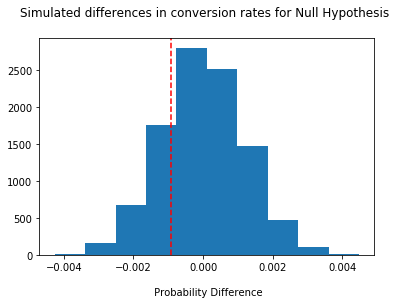

In [418]:
plt.hist(p_diffs)
plt.title("Simulated differences in conversion rates for Null Hypothesis \n")
plt.xlabel("\n Probability Difference")
plt.axvline(obs_diff, ls = 'dashed',color = 'r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

actual difference

In [409]:

new_df = df2.query('landing_page == "new_page"')
p_new_actual = new_df['converted'].mean()
old_df = df2.query('landing_page == "old_page"')
p_old_actual = old_df['converted'].mean()
act_diff = p_new_actual - p_old_actual


In [408]:
# compute p_value
p_value = (p_diffs > act_diff ).mean()
p_value

0.9039

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Conclusion

**P-Value > 0.05**.There is not enough statistical evidence to reject the null hypothesis. Therefore we **fail to reject the null hypothesis.** The graph also indicates that the observed difference is from the Null Hypothesis distribution.
    
The new page does not have a statistically significant improvement in conversion rate. Also, a less than 1% difference in conversion rate is not practical to introduce the change.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [353]:
import statsmodels.api as sm
convert_old = n_old_df['converted'].sum()
convert_new = n_new_df['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [360]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative = 'larger')

In [361]:
z_score

-1.3109241984234394

In [362]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

#### Conclusion

In both the cases we fail to reject the null. ** The results agree.** The rounded **p-value >0.05** in both the methods.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Since we are predicting a binary outcome, **Logistic Regression** is most suitable

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [198]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [203]:
# Adding dummy columns for the 2 group types
df2[['control','treatment']] = pd.get_dummies(df2['group'])

In [205]:
# Dropping control from the data frame as we need either of the columns
df2 = df2.drop('control',axis =1)

In [207]:
#Ensuring the dummy column is added and 'treatment' groups have a score of 1
df2.head()

,user_id,timestamp,group,landing_page,converted,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [209]:
df2['intercept'] = 1
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [210]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-11-11 19:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Conclusion.**

** Null Hypothesis**: **$p_{control}$** - **$p_{treatment}$** = 0. The average conversion rate of the control group is equal to the average conversion rate of the treatment group


** Alternate Hypothesis**: **$p_{control}$** - **$p_{treatment}$**!= 0. The average conversion rate of the control group is different than average conversion rate of the treatment group.


**Difference in methods:** In the first part of the analysis, we were conducting a one-sided hypothesis test to see if new page is better than old page. In the regression model we are conducting a two-sided hypothesis to see if 'group' has a significant impact on the conversion rate.

The p-value associated with the group is 0.1899. We ** Fail to Reject the Null Hypothesis** for alpha = 0.05. 

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**

The benefit of considering the other factors are the following:
1. Ability to make a decision regarding customization of page. Example: Unique page for each country or region if they are significant factors.
2. Ability to improve predictive power of the model if the other factors are providing signal to the model.

The disadvantages are:
1. We might be adding noise to our model and compromising the validity.
2. The interpretation of the model results might be challenging.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [212]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [213]:
#read few lines of the new dataframe
df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [216]:
# Check the different countries in 'country' column
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [232]:
### Create the necessary dummy variables
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new['intercept'] = 1

In [235]:
# Dropping CA from the data frame as we need either of the columns
df_new = df_new.drop('CA',axis =1)

In [237]:
#Ensuring the dummy column is added and 'country' columns have a right score
df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [239]:
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment','UK','US']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [240]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-11-11 20:12 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
treatment     -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

** Conclusion**

There is no impact of country on the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [253]:
#Adding dummy variables for page
df_new[['new_page','old_page']] = pd.get_dummies(df_new['landing_page'])
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [255]:
# Dropping CA from the data frame as we need either of the columns
df_new = df_new.drop('CA',axis =1)

In [257]:
# Dropping new_page from the data frame as we need either of the columns
df_new = df_new.drop('new_page',axis =1)

In [258]:
# Check if new columns are being added if right values are assigned to them.
df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept,UK,US,old_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0


In [260]:
#Adding interaction terms
df_new['US_page'] = df_new['US']*df_new['old_page']
df_new['UK_page'] = df_new['UK']*df_new['old_page']

In [261]:
# Check if new columns are being added if right values are assigned to them.
df_new.head()

,country,timestamp,group,landing_page,converted,treatment,intercept,UK,US,old_page,US_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,0,0,0


In [267]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'UK','US','UK_page','US_page','old_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [268]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-11-11 21:37 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0715    0.0371  -55.7977  0.0000  -2.1442  -1.9987
UK             0.0901    0.0405    2.2252  0.0261   0.0107   0.1694
US             0.0644    0.0384    1.6788  0.0932  -0.0108   0.1396
UK_page       -0.0783    0.0568   -1.3783  0.1681  -0.1896   0.0330
US_page       -0.0469    0.0538   -0.8718  0.3833  -0.1523   0.0585
old_page       0.0674    0.0520    1.2967  0.1947  -0.0345   0.1694
==================================================================

"""

** Conclusion **
This analysis shows that the interation is not statistically significant. 

In [269]:
# Interpretation of parameters
np.exp(results.params)

intercept    0.126002
UK           1.094247
US           1.066532
UK_page      0.924703
US_page      0.954198
old_page     1.069775
dtype: float64

In [270]:
# Interpretation of parameters
1/_

intercept    7.936353
UK           0.913871
US           0.937618
UK_page      1.081428
US_page      1.048001
old_page     0.934776
dtype: float64

In [422]:
df_country = df_new.groupby(['country','landing_page'])['converted'].value_counts()
df_country.groupby(level=[0,1]).apply(lambda x: x/x.sum())

country  landing_page  converted
CA       new_page      0            0.888098
                       1            0.111902
         old_page      0            0.881217
                       1            0.118783
UK       new_page      0            0.878829
                       1            0.121171
         old_page      0            0.879978
                       1            0.120022
US       new_page      0            0.881534
                       1            0.118466
         old_page      0            0.879370
                       1            0.120630
Name: converted, dtype: float64

** Overall Suggestions**

1. The company should not implement the new landing page.
2. There is no difference in conversion rate in any country. So, implementing the new landing page in any of the country is not beneficial.
3. The difference in conversion rate between old page and new page is very small, the development team could consider implementing more significant changes.

In [428]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145310 entries, 2 to 294477
Data columns (total 7 columns):
user_id         145310 non-null int64
timestamp       145310 non-null object
group           145310 non-null object
landing_page    145310 non-null object
converted       145310 non-null int64
treatment       145310 non-null uint8
intercept       145310 non-null int64
dtypes: int64(3), object(3), uint8(1)
memory usage: 7.9+ MB


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.